In [1]:
cd D:\Data TA

D:\Data TA


In [2]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 64D0-DF28

 Directory of D:\Data TA

30/05/2021  22.21    <DIR>          .
30/05/2021  22.21    <DIR>          ..
30/05/2021  22.51       537.642.024 best_weight_AlexNet.h5
27/05/2021  20.06    <DIR>          Clahe
27/05/2021  20.06    <DIR>          ClaheGaussian
25/05/2021  15.32            63.027 ex.jpg
25/05/2021  15.38             4.723 ex1.jpg
25/05/2021  15.42            80.723 ex2.jpg
25/05/2021  15.48         1.048.710 ex3.jpg
25/05/2021  15.51           786.572 ex5.png
27/05/2021  20.06    <DIR>          Gaussian
28/05/2021  19.31    <DIR>          Normalized
28/05/2021  20.47            19.452 normalized accuracy (adam 0.1).png
28/05/2021  20.47             8.293 normalized loss (adam 0.1).png
28/05/2021  18.58                68 result.txt
27/05/2021  14.38    <DIR>          Selected Covidset
               9 File(s)    539.653.592 bytes
               7 Dir(s)  287.482.945.536 bytes free


In [3]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
#Normalized dataset
import PIL.Image as pil_image
import io
path ='D:\\Data TA\\Selected Covidset\\Covid\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\Normalized\\Covid\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Normalized Success")

In [ ]:
#Gaussian Filter
import cv2
from skimage import io
from skimage.filters import gaussian
path ='D:\\Data TA\\Normalized\\Covid\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\Gaussian\\Covid\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Denoissing Success")

In [ ]:
#CLAHE
from skimage import exposure
path ='D:\\Data TA\\Gaussian\\Normal\\'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='D:\\Data TA\\ClaheGaussian\\Normal\\' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

In [4]:
img = Image.open('D:\\Data TA\\Normalized\\Normal\\IM00001.tif')
img = img.convert('RGB')
save_path = 'D:\\Data TA\\Normalized\\Normal\\test.jpg'
img.save(save_path,'JPEG')
#plt.imshow(img)

In [5]:
import cv2

im = cv2.imread('D:\\Data TA\\ClaheGaussian\\Normal\\IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

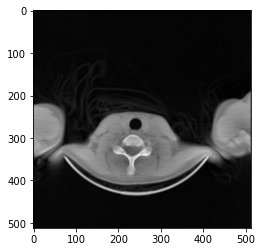

In [6]:
plt.imshow(im_rgb)

In [7]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Normalized") 
data = []
labels = []

[INFO] loading images...


In [8]:
width = 224
height = 224
dsize = (width, height)
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
    image = cv2.imread(imagePath,-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = image.convert('L')
    image = cv2.resize(image,dsize)
    image = np.array(image)
    data.append(image)

  # extract the class label from the file path and update the
	# labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

Covid


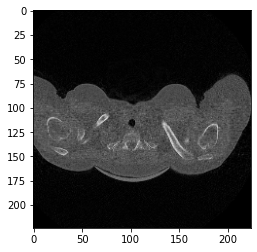

In [9]:
print(labels[0])
plt.imshow(data[0])

In [10]:
print(labels)

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 

In [10]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [12]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [13]:
data = np.array(data)
data.shape

(1000, 224, 224, 3)

In [13]:
data = np.expand_dims(data, axis=3)
data.shape

(1000, 224, 224, 1, 3)

In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(750, 224, 224, 3)
(250, 224, 224, 3)
(750,)
(250,)


In [15]:
print(trainX[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


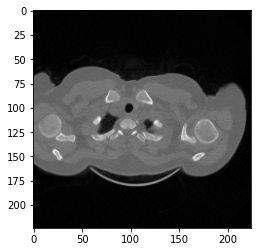

In [16]:
plt.imshow(trainX[0])

In [82]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

In [84]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_AlexNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [85]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 20.0537 - accuracy: 0.6133
Epoch 00001: val_accuracy improved from -inf to 0.56800, saving model to best_weight_AlexNet.h5
24/24 [==============================] - 64s 3s/step - loss: 20.0537 - accuracy: 0.6133 - val_loss: 0.7109 - val_accuracy: 0.5680
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 0.4535 - accuracy: 0.7933
Epoch 00002: val_accuracy improved from 0.56800 to 0.57600, saving model to best_weight_AlexNet.h5
24/24 [==============================] - 42s 2s/step - loss: 0.4535 - accuracy: 0.7933 - val_loss: 0.7032 - val_accuracy: 0.5760
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9080
Epoch 00003: val_accuracy did not improve from 0.57600
24/24 [==============================] - 37s 2s/step - loss: 0.2327 - accuracy: 0.9080 - val_loss: 0.9551 - val_accuracy: 0.5600
Epoch 4/50
24/24 [==============================] - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


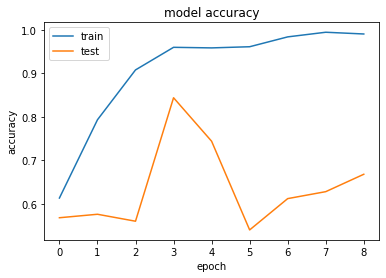

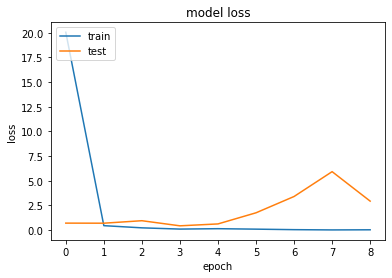

In [86]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
predictions = model.predict(testX, batch_size=32)

In [88]:
print(predictions.argmax(axis=1))

[1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1]


In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [90]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY,predictions.argmax(axis=1),target_names = encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       Covid       0.76      0.99      0.86       121
      Normal       0.99      0.71      0.82       129

    accuracy                           0.84       250
   macro avg       0.87      0.85      0.84       250
weighted avg       0.88      0.84      0.84       250



In [91]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[120   1]
 [ 38  91]]


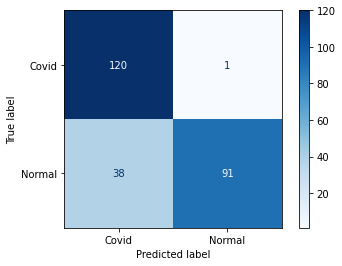

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)